#### Importing required libraries


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import requests, io
from zipfile import ZipFile

#### Importing dataset

In [17]:
df = pd.read_csv("FBI_dataset.csv")
print("hi")


#### Printing head to view my dataset

In [18]:
df.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,UNFOUNDED_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
0,2013,MO0950000,St. Louis County Police Department,NaN,County,MO,Missouri,West North Central,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",HTCSA,Human Trafficking,Commercial Sex Acts,384,0.0,384,0
1,2013,OH0020000,Allen,NaN,County,OH,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTCSA,Human Trafficking,Commercial Sex Acts,64,0.0,64,0
2,2013,OH0020000,Allen,NaN,County,OH,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTIS,Human Trafficking,Involuntary Servitude,64,0.0,0,0
3,2013,TN0320100,Morristown,NaN,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",HTCSA,Human Trafficking,Commercial Sex Acts,64,0.0,64,0
4,2013,TNMPD0000,Memphis,NaN,City,TN,Tennessee,East South Central,SHELBY,South,1B,"Cities from 500,000 thru 999,999",HTCSA,Human Trafficking,Commercial Sex Acts,192,0.0,128,0


## Data cleaning

#### Check for missing values

In [19]:
df.isnull().sum()

DATA_YEAR                    0
ORI                          0
PUB_AGENCY_NAME              0
PUB_AGENCY_UNIT           2867
AGENCY_TYPE_NAME             0
STATE_ABBR                   0
STATE_NAME                   0
DIVISION_NAME                0
COUNTY_NAME                  0
REGION_NAME                  0
POPULATION_GROUP_CODE        3
POPULATION_GROUP_DESC        3
OFFENSE_SUBCAT_ID            0
OFFENSE_NAME                 0
OFFENSE_SUBCAT_NAME          0
ACTUAL_COUNT                 0
UNFOUNDED_COUNT           1969
CLEARED_COUNT                0
JUVENILE_CLEARED_COUNT       0
dtype: int64

PUB_AGENCY_UNIT and UNFOUNDED_COUNT columns ar having more null values,we can remove these from dataset as it has no impact in our analysis.

In [20]:
columns_to_remove = ['PUB_AGENCY_UNIT', 'UNFOUNDED_COUNT']
df = df.drop(columns_to_remove, axis=1)

In [21]:
df.head()

,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
0,2013,MO0950000,St. Louis County Police Department,County,MO,Missouri,West North Central,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",HTCSA,Human Trafficking,Commercial Sex Acts,384,384,0
1,2013,OH0020000,Allen,County,OH,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTCSA,Human Trafficking,Commercial Sex Acts,64,64,0
2,2013,OH0020000,Allen,County,OH,Ohio,East North Central,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",HTIS,Human Trafficking,Involuntary Servitude,64,0,0
3,2013,TN0320100,Morristown,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",HTCSA,Human Trafficking,Commercial Sex Acts,64,64,0
4,2013,TNMPD0000,Memphis,City,TN,Tennessee,East South Central,SHELBY,South,1B,"Cities from 500,000 thru 999,999",HTCSA,Human Trafficking,Commercial Sex Acts,192,128,0


# Handling the duplicates

In [22]:
df = df.drop_duplicates()

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3098 entries, 0 to 3097
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DATA_YEAR               3098 non-null   int64 
 1   ORI                     3098 non-null   object
 2   PUB_AGENCY_NAME         3098 non-null   object
 3   AGENCY_TYPE_NAME        3098 non-null   object
 4   STATE_ABBR              3098 non-null   object
 5   STATE_NAME              3098 non-null   object
 6   DIVISION_NAME           3098 non-null   object
 7   COUNTY_NAME             3098 non-null   object
 8   REGION_NAME             3098 non-null   object
 9   POPULATION_GROUP_CODE   3095 non-null   object
 10  POPULATION_GROUP_DESC   3095 non-null   object
 11  OFFENSE_SUBCAT_ID       3098 non-null   object
 12  OFFENSE_NAME            3098 non-null   object
 13  OFFENSE_SUBCAT_NAME     3098 non-null   object
 14  ACTUAL_COUNT            3098 non-null   int64 
 15  CLEA

#### Checking for any duplicate rows

In [24]:
print(df.duplicated().sum())

0


In [25]:
# Use the sample method to select 20 random rows
random_sample = df.sample(n=20)

# Display the randomly selected 20 rows in a table format
print(random_sample.to_string(index=False))

 DATA_YEAR       ORI               PUB_AGENCY_NAME   AGENCY_TYPE_NAME STATE_ABBR STATE_NAME      DIVISION_NAME   COUNTY_NAME REGION_NAME POPULATION_GROUP_CODE                    POPULATION_GROUP_DESC OFFENSE_SUBCAT_ID      OFFENSE_NAME   OFFENSE_SUBCAT_NAME  ACTUAL_COUNT  CLEARED_COUNT  JUVENILE_CLEARED_COUNT
      2016 MN0270300                 Brooklyn Park               City         MN  Minnesota West North Central      HENNEPIN     Midwest                     3           Cities from 50,000 thru 99,999             HTCSA Human Trafficking   Commercial Sex Acts           192            128                       0
      2017 KYKSP0500                 State Police:       State Police         KY   Kentucky East South Central NOT SPECIFIED       South                    8E                     Non-MSA State Police              HTIS Human Trafficking Involuntary Servitude            15             15                       0
      2017 MO0150000                        Camden             Coun

Numeric Columns

In [26]:
round(df.describe(),1)

,DATA_YEAR,ACTUAL_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
count,3098.0,3098.0,3098.0,3098.0
mean,2018.6,233.1,99.8,5.6
std,2.0,696.1,341.1,62.4
min,2013.0,-64.0,0.0,0.0
25%,2017.0,64.0,0.0,0.0
50%,2019.0,64.0,0.0,0.0
75%,2020.0,168.0,64.0,0.0
max,2021.0,13056.0,6976.0,2176.0


In [27]:
# frequency of non numeric values

display(
    HTML("<center><h1>Categorical Columns</h1></center>"),
    HTML("<center><h3>Descriptive Statistics</h3></center>"),
    df.describe(include = ['O']) 
)

,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME
count,3098,3098,3098,3098,3098,3098,3098,3098,3095,3095,3098,3098,3098
unique,1460,1177,8,50,50,10,711,5,19,19,2,1,2
top,TXHPD0000,State Police:,City,TX,Texas,South Atlantic,NOT SPECIFIED,South,2,"Cities from 100,000 thru 249,999",HTCSA,Human Trafficking,Commercial Sex Acts
freq,16,221,1999,478,478,742,83,1560,378,378,2296,3098,2296


In [29]:
# checking data types - are dates in date format, numbers read as numeric, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3098 entries, 0 to 3097
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DATA_YEAR               3098 non-null   int64 
 1   ORI                     3098 non-null   object
 2   PUB_AGENCY_NAME         3098 non-null   object
 3   AGENCY_TYPE_NAME        3098 non-null   object
 4   STATE_ABBR              3098 non-null   object
 5   STATE_NAME              3098 non-null   object
 6   DIVISION_NAME           3098 non-null   object
 7   COUNTY_NAME             3098 non-null   object
 8   REGION_NAME             3098 non-null   object
 9   POPULATION_GROUP_CODE   3095 non-null   object
 10  POPULATION_GROUP_DESC   3095 non-null   object
 11  OFFENSE_SUBCAT_ID       3098 non-null   object
 12  OFFENSE_NAME            3098 non-null   object
 13  OFFENSE_SUBCAT_NAME     3098 non-null   object
 14  ACTUAL_COUNT            3098 non-null   int64 
 15  CLEA

## Exploratory Data Analysis


Taking a look at percentage of total of data points there are for each value in a row/column for each column in the dataset.

In [30]:
for i in df.columns:
    display(pd.DataFrame(round(df[i].value_counts(normalize=True)*100,2)))

,DATA_YEAR
2021,21.17
2020,20.63
2019,17.75
2018,12.75
2017,10.78
2016,8.17
2015,4.55
2014,4.00
2013,0.19


,ORI
TXHPD0000,0.52
TX2270100,0.52
TX1010000,0.48
TXSPD0000,0.48
TXDPD0000,0.48
...,...
IL0820400,0.03
IN0190200,0.03
IN0320300,0.03
IN0840100,0.03


,PUB_AGENCY_NAME
State Police:,7.13
Greenville,0.65
Austin,0.61
Houston,0.55
Dallas,0.55
...,...
Minnetrista,0.03
Hubbard,0.03
Refugio,0.03
Pine,0.03


,AGENCY_TYPE_NAME
City,64.53
County,25.66
State Police,8.07
Other,0.61
Other State Agency,0.61
Tribal,0.32
University or College,0.10
Federal,0.10


,STATE_ABBR
TX,15.43
MN,8.81
FL,5.36
WI,4.65
GA,4.42
TN,3.78
MI,3.71
MA,3.65
CO,3.58
KY,3.49


,STATE_NAME
Texas,15.43
Minnesota,8.81
Florida,5.36
Wisconsin,4.65
Georgia,4.42
Tennessee,3.78
Michigan,3.71
Massachusetts,3.65
Colorado,3.58
Kentucky,3.49


,DIVISION_NAME
South Atlantic,23.95
West South Central,18.53
East North Central,14.43
West North Central,14.04
Mountain,8.10
East South Central,7.88
New England,7.36
Pacific,4.68
Middle Atlantic,0.94
Other,0.10


,COUNTY_NAME
NOT SPECIFIED,2.68
HENNEPIN,1.97
WASHINGTON,1.16
JEFFERSON,1.10
KING,1.10
...,...
COLORADO,0.03
CONCHO,0.03
"DALLAS, ELLIS, TARRANT",0.03
SWISHER,0.03


,REGION_NAME
South,50.36
Midwest,28.47
West,12.78
Northeast,8.30
Other,0.10


,POPULATION_GROUP_CODE
2,12.21
3,11.95
5,10.31
9A,10.08
4,9.11
6,7.40
9B,6.79
1C,5.30
1B,4.56
8D,4.56


,POPULATION_GROUP_DESC
"Cities from 100,000 thru 249,999",12.21
"Cities from 50,000 thru 99,999",11.95
"Cities from 10,000 thru 24,999",10.31
"MSA counties 100,000 or over",10.08
"Cities from 25,000 thru 49,999",9.11
"Cities from 2,500 thru 9,999",7.40
"MSA counties from 25,000 thru 99,999",6.79
"Cities from 250,000 thru 499,999",5.30
"Cities from 500,000 thru 999,999",4.56
"Non-MSA counties under 10,000",4.56


,OFFENSE_SUBCAT_ID
HTCSA,74.11
HTIS,25.89


,OFFENSE_NAME
Human Trafficking,100.0


,OFFENSE_SUBCAT_NAME
Commercial Sex Acts,74.11
Involuntary Servitude,25.89


,ACTUAL_COUNT
64,40.28
128,11.10
192,5.78
0,5.00
256,3.03
...,...
116,0.03
600,0.03
7296,0.03
294,0.03


,CLEARED_COUNT
0,54.36
64,19.59
128,5.49
192,2.42
256,1.78
...,...
300,0.03
104,0.03
1856,0.03
168,0.03


,JUVENILE_CLEARED_COUNT
0,96.68
64,1.97
128,0.32
192,0.13
448,0.06
22,0.06
960,0.06
320,0.06
32,0.03
48,0.03


In [31]:
print ("\033[1mPercentage of total with null values for:\033[0m\n")
for i in df.columns:
    if df[i].isna().sum():
        print (i, round(df[i].isna().sum()/len(df),3), "%")

Percentage of total with null values for:

POPULATION_GROUP_CODE 0.001 %
POPULATION_GROUP_DESC 0.001 %


There are three apiece for Population Group Code and Population Group Desc. accounting for just .1% of the dataset (minimal). It seems that Unfounded_Count null values likely can be interpreted as zero; that who did data entry just left that blank if there were none

In [42]:
# finding Top 10 percentages of unsolved cases  
display (pd.DataFrame (df['CLEARED_COUNT'].value_counts(normalize = True)*100).head(10))

,CLEARED_COUNT
0,54.357650
64,19.593286
128,5.487411
192,2.420917
256,1.775339
320,1.452550
384,0.936088
25,0.806972
512,0.613299
45,0.613299


In [33]:
#checking number of rows and columns in the dataset
df.shape

(3098, 17)

There are 3098 rows with 19 columns
Next I'd like to look at just tribal agencies who filed criminal trafficking reports.

In [34]:
df.query("AGENCY_TYPE_NAME.str.contains ('Tribal')")

,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_SUBCAT_ID,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT,CLEARED_COUNT,JUVENILE_CLEARED_COUNT
1101,2018,NDDI00200,Fort Totten Agency,Tribal,ND,North Dakota,West North Central,NOT SPECIFIED,Midwest,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,18,0,0
1468,2019,MIDI06000,Little River Band of Ottawa Indians,Tribal,MI,Michigan,East North Central,NOT SPECIFIED,Midwest,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,18,0,0
1507,2019,MNDI02300,Upper Sioux Community,Tribal,MN,Minnesota,West North Central,NOT SPECIFIED,Midwest,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,11,11,0
1527,2019,MTDI05000,Crow Agency,Tribal,MT,Montana,Mountain,NOT SPECIFIED,West,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,18,0,0
1771,2019,WIDI01100,Lac Courte Oreilles Tribal,Tribal,WI,Wisconsin,East North Central,NOT SPECIFIED,Midwest,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,14,0,0
1831,2020,CTDI00300,Mohegan Tribal,Tribal,CT,Connecticut,New England,NOT SPECIFIED,Northeast,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,18,0,0
2046,2020,MIDI06000,Little River Band of Ottawa Indians,Tribal,MI,Michigan,East North Central,NOT SPECIFIED,Midwest,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,0,18,0
2393,2020,WI0451200,Oneida Tribal,Tribal,WI,Wisconsin,East North Central,NOT SPECIFIED,Midwest,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,25,25,0
2824,2021,OKDI18000,Chickasaw Nation,Tribal,OK,Oklahoma,West South Central,NOT SPECIFIED,South,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,18,0,0
2861,2021,SD0600200,Rosebud Tribal,Tribal,SD,South Dakota,West North Central,NOT SPECIFIED,Midwest,7,"Cities under 2,500",HTCSA,Human Trafficking,Commercial Sex Acts,18,0,0


## Graphing Relationships

Visualizing some of the relationships
Sorting number of reported cases in descending order and assigned to a new variable name, then using matplotlib to design a graph showing cases reported by state

In [35]:
df_sorted = df.sort_values('ACTUAL_COUNT', ascending = False)

<BarContainer object of 3098 artists>

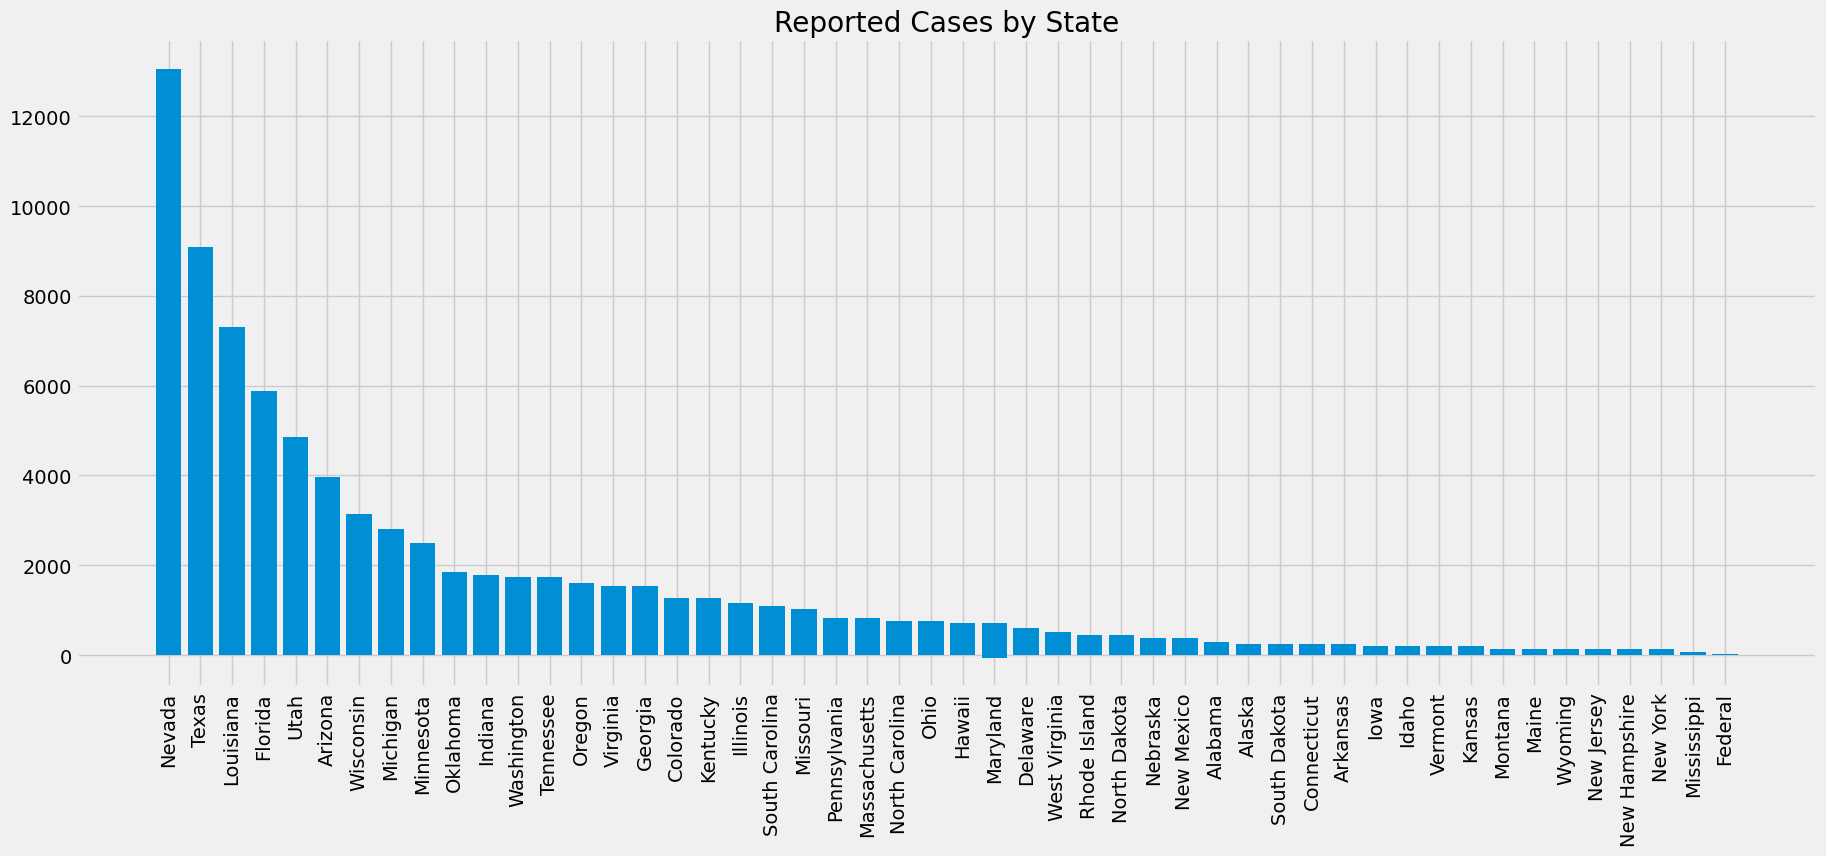

In [36]:
plt.style.use("fivethirtyeight")
plt.subplots (figsize = (20,8))
plt.xticks(rotation = 90)
plt.title("Reported Cases by State")
plt.bar(df_sorted["STATE_NAME"], df_sorted["ACTUAL_COUNT"])

 This bar chart with State Names on the x-axis and Reported Case Counts on the y-axis. The full DataFrame likely contains the case data for all states, and df_sorted orders it appropriately for the bar chart. This provides an informative visualization of the case count data across different states.

This graph is what led me to look more closely at Nevada, and a closer look at more specific granular data follows on page 2.
Note that this style graph could be used to further answer a question of "safest states," or something similar.

As shown below, the average actual count of human trafficking offenses have increased over the years, or reporting of them has increased. It's important to take into account that 2013 may have only had partial reporting and should not be included in any summary statistics.

C:\Users\vj\AppData\Local\Temp\ipykernel_25528\2430712487.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby('DATA_YEAR').sum().ACTUAL_COUNT.index, df.groupby('DATA_YEAR').sum().ACTUAL_COUNT.values)
C:\Users\vj\AppData\Local\Temp\ipykernel_25528\2430712487.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.groupby('DATA_YEAR').sum().ACTUAL_COUNT.index, df.groupby('DATA_YEAR').sum().ACTUAL_COUNT.values)


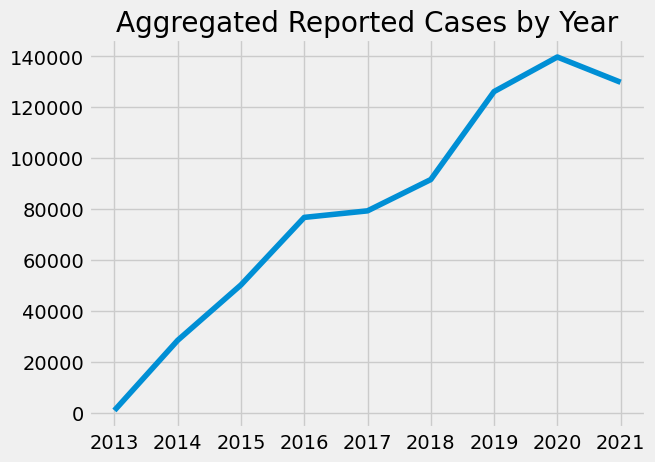

In [43]:
df.groupby('DATA_YEAR')
plt.plot(df.groupby('DATA_YEAR').sum().ACTUAL_COUNT.index, df.groupby('DATA_YEAR').sum().ACTUAL_COUNT.values)
plt.title ("Aggregated Reported Cases by Year")         
plt.show()

This takes the full data set, aggregates the total actual reported cases by year, plots those yearly totals on a line chart, and labels appropriately. This provides a high-level visualization of the trend in total cases over time.

Creating a line plot of the number of solved cases each year, showing a general trend down.

<Axes: xlabel='DATA_YEAR', ylabel='CLEARED_COUNT'>

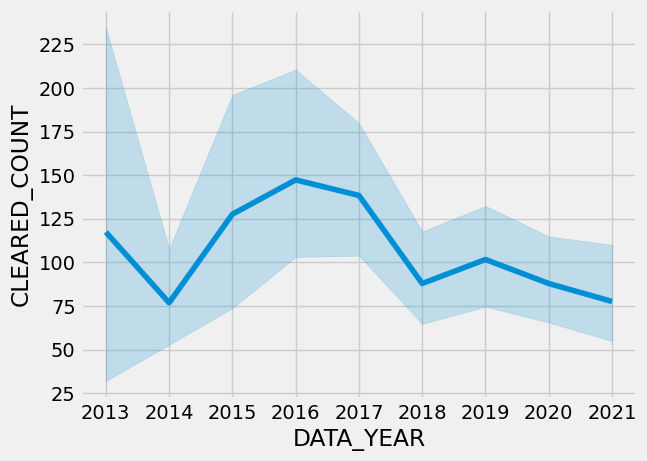

In [38]:
sns.lineplot(x="DATA_YEAR", y="CLEARED_COUNT", data=df)

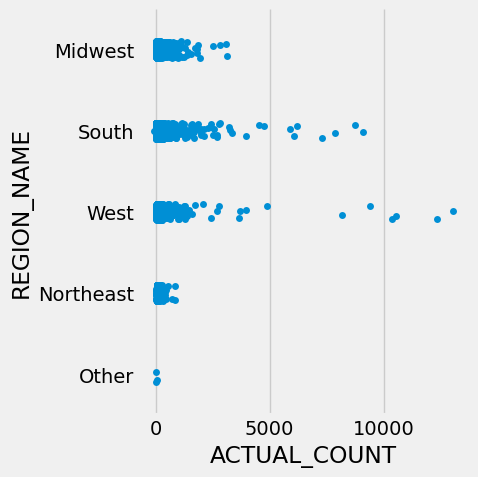

In [39]:
sns.catplot(x="ACTUAL_COUNT", y="REGION_NAME", data=df)

This generates a catplot , to show the distribution of case counts for each region.The x-axis contains the continuous numeric case count data, while the y-axis groups this data into categorical bins by region. This helps visualize regional variations in case volumes.

Rankings With Highest Occurrences of Human Trafficking

Ranking of top 30 states with overall highest occurrences for all of the past 8 years

In [44]:
df[['STATE_NAME','ACTUAL_COUNT']].groupby('STATE_NAME').sum().sort_values(by=['ACTUAL_COUNT'], ascending = False).head(30)

,ACTUAL_COUNT
STATE_NAME,
Texas,186548
Nevada,75983
Minnesota,62058
Florida,40561
Wisconsin,30999
Tennessee,28285
Georgia,26356
Colorado,21230
Washington,19419
